In [93]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def F(x):
    return - x + 10

def df(x):
    return np.full_like(x, -1)

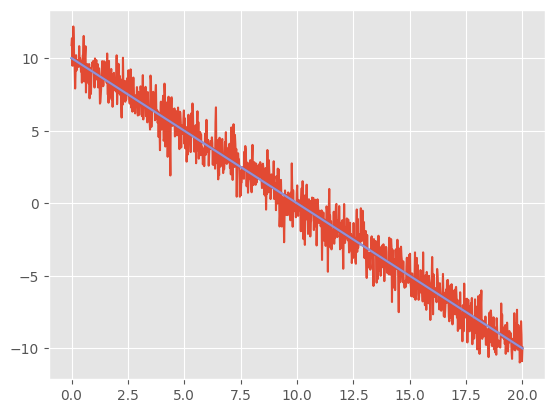

In [94]:
num_samples = 1000
distances = np.linspace(0, 20, num_samples)

y = F(distances)

noise = np.random.normal(loc=0, scale=1, size=num_samples)

noisy_y = y + noise
y_hat = F(distances)

plt.plot(distances, noisy_y, zorder=1)
plt.plot(distances, y, zorder=2)
plt.plot(distances, y_hat, zorder=2)
plt.show()

In [95]:
def f(theta, x):
    return - theta * x + 10

def df_dx(theta, x):
    return np.full_like(x, - theta)

def df_dtheta(theta, x):
    return np.full_like(x, - x)

2.7951756433639705
0.7121636504123832
4.405572280268499


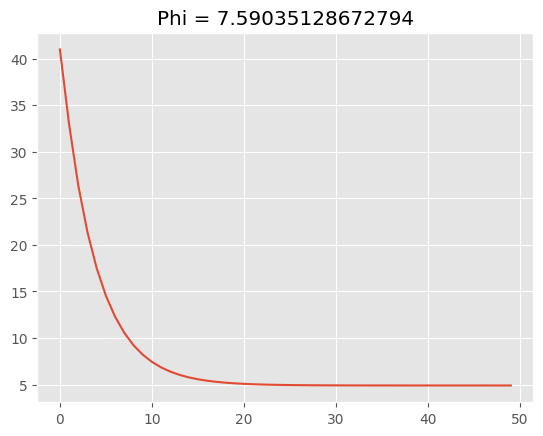

In [96]:
sigma_x = 1
sigma_y = 1

theta = 0.5

prior   = 9
y_sample = 9

phi     = 0
vfes    = []

for i in range(50):

    error_y = ( y_sample - f(theta, phi) ) / sigma_y

    error_x = ( phi - prior ) / sigma_x

    phi += 0.1 * ( error_y * df_dx(theta, phi) - error_x)

    vfes.append(1 / 2 * ( error_y**2 + error_x**2 ))

print(( y_sample - f(theta, phi) ) / sigma_y)

theta += 0.01 * phi * ( y_sample - f(theta, phi) ) / sigma_y

print(theta)

print(( y_sample - f(theta, phi) ) / sigma_y)

plt.plot(vfes)
plt.title(f'Phi = {phi}')
plt.show()

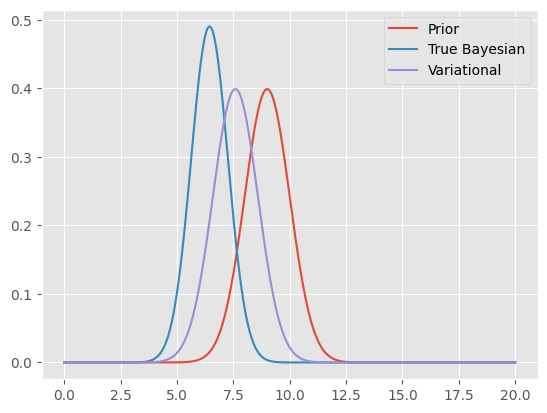

In [97]:
numerator = np.multiply(norm.pdf(y_sample, loc=f(theta, distances), scale=1), norm.pdf(distances, loc=prior, scale=1))

normalization = sum(numerator * 0.02)

plt.plot(distances, norm.pdf(distances, loc=prior, scale=1), label='Prior')
plt.plot(distances, numerator / normalization, label='True Bayesian')
plt.plot(distances, norm.pdf(distances, loc=phi, scale=np.sqrt(sigma_x)), label='Variational')

plt.legend()
plt.show()